In [1]:
%load_ext autoreload
%autoreload 2
from taigapy import TaigaClient
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from cds import plotting
from mgenepy.utils import helper
from taigapy import create_taiga_client_v3
#from depmap_omics_upload import tracker as track

tc = TaigaClient()

In [2]:
from statsmodels.formula.api import ols

In [3]:
import statsmodels.api as sm

In [4]:
%%capture

OmicsExpressionProteinCodingGenesTPMLogp1 = tc.get(name='internal-23q4-ac2b', version=68, file='OmicsExpressionProteinCodingGenesTPMLogp1')
OmicsExpressionAllGenesEffectiveLengthProfile = tc.get(name='internal-23q4-ac2b', version=68, file='OmicsExpressionAllGenesEffectiveLengthProfile')
OmicsExpressionAllGenesTPMLogp1Profile = tc.get(name='internal-23q4-ac2b', version=68, file='OmicsExpressionAllGenesTPMLogp1Profile')
OmicsExpressionGenesExpectedCountProfile = tc.get(name='internal-23q4-ac2b', version=68, file='OmicsExpressionGenesExpectedCountProfile')
OmicsDefaultModelProfiles = tc.get(name='internal-23q4-ac2b', version=68, file='OmicsDefaultModelProfiles')
OmicsDefaultModelConditionProfiles = tc.get(name='internal-23q4-ac2b', version=68, file='OmicsDefaultModelConditionProfiles')

In [5]:
profile_to_model_dict = OmicsDefaultModelProfiles.query("ProfileType == 'rna'").\
        set_index("ProfileID").\
        drop("ProfileType", axis=1).\
        to_dict()["ModelID"]

In [6]:
rnaseq_strandness_inference = tc.get(name='rnaseq-strandness-inference-cae2', version=1, file='rnaseq_strandness_inference')

[                      ]  0% |   0.0 s/B |   0.0 B /  40.0 KiB | ETA:  --:--:--
[##################]100% |  39.4 MiB/s |  40.0 KiB /  40.0 KiB | ETA:  00:00:00


In [7]:
rnaseq_strandness_inference.head()

,sample_id,Fraction of reads failed to determine,"Fraction of reads explained by ""1++,1--,2+-,2-+""","Fraction of reads explained by ""1+-,1-+,2++,2--""",Profile,strandness
0,CDS-010xbm,0.0259,0.0212,0.9528,PR-AdBjpG,True
1,CDS-02TzJp,0.0301,0.0153,0.9546,PR-I2AzwG,True
2,CDS-04NSe4,0.0135,0.0304,0.9560,PR-iQmzF3,True
3,CDS-0693hw,0.0142,0.0101,0.9757,PR-5ekAAC,True
4,CDS-07Plat,0.0234,0.0079,0.9687,NaN,True


In [8]:
tc = create_taiga_client_v3()
df_gene_effect = tc.get('internal-23q4-ac2b.68/CRISPRGeneEffect')

In [9]:
df_gene_effect.head()

,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
ACH-000001,-0.095061,0.056694,0.045961,-0.169475,-0.024669,0.337310,-0.022525,-0.119822,0.180870,0.045184,...,-0.137586,0.011028,0.149662,0.309245,0.180299,-0.257746,-0.020003,0.086519,0.121076,-0.467081
ACH-000004,-0.014141,-0.069027,-0.090334,-0.059851,0.007217,0.012467,0.319230,-0.099312,0.207448,0.183822,...,-0.209179,-0.420732,0.186465,0.107289,0.126151,0.068953,-0.389859,0.082071,0.285443,-0.075159
ACH-000005,-0.117444,0.022142,0.186275,0.090944,-0.129305,-0.102159,0.213622,-0.089824,-0.104679,0.070451,...,-0.333891,-0.453153,-0.093295,-0.061744,0.009252,-0.210187,-0.181788,-0.066776,0.019221,-0.165291
ACH-000007,-0.051711,-0.094682,0.065743,0.083394,0.015167,0.140738,0.056952,-0.254952,-0.176011,0.222967,...,-0.335173,-0.452485,-0.035450,0.263585,0.043859,-0.073312,-0.449223,0.016872,-0.284166,-0.449154
ACH-000009,0.002336,-0.133981,0.063479,0.061919,0.104689,0.038360,0.080136,-0.165914,0.053202,0.118570,...,-0.294201,-0.317915,-0.063940,0.270825,-0.071296,-0.096871,-0.585607,0.073148,0.006722,-0.302816


In [10]:
rnaseq_strandness_inference['model_id'] = rnaseq_strandness_inference.Profile.map(profile_to_model_dict)

In [27]:
gene_exp_with_strand = rnaseq_strandness_inference.loc[:, ['strandness', 'model_id']].merge(df_gene_effect, left_on='model_id', right_index=True).fillna(0)

In [28]:
#gene_eff_with_strand = rnaseq_strandness_inference.loc[:, ['strandness', 'model_id']].merge(df_gene_effect, left_on='model_id', right_index=True)

In [29]:
gene_exp_with_strand.columns = gene_exp_with_strand.columns.map(lambda x: x.split()[0])

In [30]:
gene_exp_with_strand.columns = gene_exp_with_strand.columns.map(lambda x: x.replace("-", "_"))

In [31]:
gene_exp_with_strand.head()

,strandness,model_id,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
1,True,ACH-001289,-0.068904,-0.048852,0.149217,-0.099686,-0.167408,-0.034267,0.052643,-0.224737,...,-0.336887,-0.327865,0.113000,0.098985,0.228290,-0.143943,-0.436279,-0.111736,-0.115814,-0.384909
8,False,ACH-000792,-0.052640,-0.006476,0.133520,-0.017690,-0.040130,0.171573,0.118090,-0.055436,...,-0.199660,-0.332640,0.162474,0.230283,-0.045801,0.014840,-0.112315,0.009608,-0.171878,-0.043699
9,True,ACH-001098,-0.038030,0.042083,-0.019681,0.172695,-0.271337,-0.094765,0.154178,-0.442781,...,-0.164584,-0.875905,-0.209009,0.353112,0.020812,-0.033503,-0.067341,-0.157525,-0.076153,-0.180721
10,True,ACH-001538,-0.048501,-0.011658,-0.095111,0.111847,-0.203427,0.095461,0.019710,-0.072826,...,-0.167839,-0.468269,0.009162,0.000317,0.154488,-0.137269,-0.299843,0.013617,-0.213334,-0.438291
16,False,ACH-000570,0.003927,-0.057902,0.134673,0.092704,-0.293602,0.069115,-0.078678,-0.074066,...,-0.254545,-0.590306,0.170956,0.003822,-0.071664,-0.138300,-0.257072,-0.134620,-0.324711,-0.200896


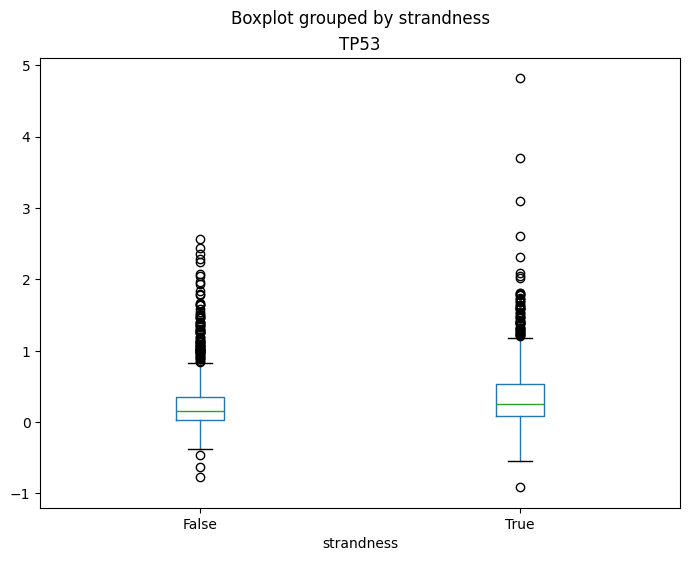

In [32]:
fig, ax = plt.subplots(figsize=(8, 6))
fig = gene_exp_with_strand.boxplot("TP53", "strandness", ax=ax, grid=False)

In [33]:
from statsmodels.stats.api import anova_lm
anova_tables = []
for gene in gene_exp_with_strand.columns[2:]:
    gene_exp_with_strand_lm = ols(f"{gene} ~ C(strandness)", data=gene_exp_with_strand).fit()
    table9 = anova_lm(gene_exp_with_strand_lm, type=2)
    anova_tables.append(table9)
    #print(gene_exp_with_strand_lm.model.data.orig_exog)

In [34]:
PR_dict = {}
for gene, table in zip(gene_exp_with_strand.columns[2:], anova_tables):
    PR_dict[gene] = table.loc[:, 'PR(>F)'][0]
    #break

In [35]:
import pandas as pd
from cds import plotting

PR_series = pd.Series(PR_dict)

Text(0.5, 0, 'CRISPR gene effect ANOVA p value with strandness')

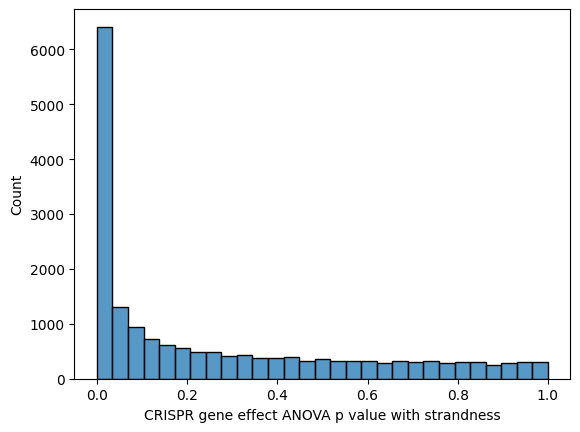

In [47]:
sns.histplot(PR_series)
plt.xlabel("CRISPR gene effect ANOVA p value with strandness")

In [37]:
PR_series.sort_values()[:100]

RPL15     1.341413e-30
RPSA      1.650799e-30
LCE2C     7.991254e-29
RPL7      3.262165e-25
EIF1AY    4.391667e-25
              ...     
SHLD3     3.781069e-13
PRKDC     3.867755e-13
SVOP      3.952837e-13
S100A7    3.979587e-13
IL3RA     4.696665e-13
Length: 100, dtype: float64

In [38]:
(PR_series<1e-3).sum(), PR_series.shape

(2723, (18443,))

In [39]:
oncokb = pd.read_csv("~/OncoKB_Annotated_Final_2024-03-19_08-12-54.csv")

In [40]:
oncokb.head()

,Chromosome,Position,Ref,Alt,EntrezGeneID,HugoSymbol,ProteinChange,HgvsFormat,Oncogenic,MutationEffect,Citation_PMIDs,HighestSensitiveLevel,HighestResistanceLevel,Hotspot
0,chr1,26732685,C,T,8289.0,ARID1A,Q605*,1:g.26732685C>T,Likely Oncogenic,Likely Loss-of-function,"['21900401', '24899687', '22009941', '25625625']",LEVEL_4,NaN,False
1,chr1,235229231,T,C,NaN,ARID4B,E299E,1:g.235229231T>C,Likely Oncogenic,Likely Loss-of-function,"['24382590', '18728284']",NaN,NaN,False
2,chr2,47783349,G,A,2956.0,MSH6,G39E,2:g.47783349G>A,Inconclusive,Inconclusive,['24362816'],NaN,NaN,False
3,chr2,141059052,A,G,NaN,LRP1B,V413V,2:g.141059052A>G,Likely Oncogenic,Likely Loss-of-function,"['28408316', '33653800']",NaN,NaN,False
4,chr3,37048980,A,G,4292.0,MLH1,Q448R,3:g.37048980A>G,Inconclusive,Inconclusive,"['25092538', '24362816']",NaN,NaN,False


In [45]:
np.intersect1d(PR_series[PR_series<1e-2].index, oncokb.HugoSymbol).shape, \
  np.intersect1d(PR_series[PR_series<1e-3].index, oncokb.HugoSymbol).shape

((93,), (44,))

In [42]:
np.intersect1d(PR_series[PR_series<1e-2].index, oncokb.HugoSymbol), oncokb.HugoSymbol.unique().shape

(array(['ARID1A', 'ASXL2', 'ATR', 'ATRX', 'BARD1', 'BCL11B', 'BRCA2',
        'BRD4', 'CCNQ', 'CDK12', 'CDKN1A', 'CDKN2B', 'CEBPA', 'CHEK1',
        'CIC', 'CRBN', 'CREBBP', 'CYLD', 'DICER1', 'ECT2L', 'EGR1',
        'ERCC4', 'ERRFI1', 'ESCO2', 'FANCA', 'FANCC', 'FANCD2', 'FANCL',
        'FAS', 'FH', 'FOXL2', 'GNA11', 'H3C2', 'HNF1A', 'HTATIP2', 'ID3',
        'INHA', 'KDM6A', 'KDR', 'KLF2', 'LRP6', 'MAL2', 'MAP2K4', 'MLH1',
        'MPL', 'MSH3', 'MTOR', 'MYC', 'MYCN', 'NFE2L2', 'NOTCH3', 'NOTCH4',
        'NPM1', 'NSD2', 'NTHL1', 'NTRK1', 'PARP1', 'PHOX2B', 'PIK3R3',
        'POLE', 'PPM1D', 'PRDM1', 'PRKDC', 'PRPF8', 'PTPN13', 'RAD50',
        'RAD51B', 'RAD52', 'RECQL4', 'RHOA', 'RNF43', 'RPS6KA4', 'RXRA',
        'SDHC', 'SESN3', 'SETD2', 'SHQ1', 'SLFN11', 'SLX4', 'SOX17',
        'STAT5B', 'TGFBR1', 'TGFBR2', 'TMPRSS2', 'TP53', 'TP53BP1', 'TP63',
        'TYK2', 'XPO1', 'XRCC1', 'ZBTB20', 'ZFHX3', 'ZNF750'], dtype=object),
 (437,))

In [44]:
np.intersect1d(PR_series[PR_series<1e-3].index, oncokb.HugoSymbol), oncokb.HugoSymbol.unique().shape

(array(['ASXL2', 'ATR', 'ATRX', 'BARD1', 'BCL11B', 'CCNQ', 'CDK12',
        'CHEK1', 'CYLD', 'EGR1', 'ERCC4', 'ERRFI1', 'ESCO2', 'FANCA',
        'FANCC', 'FANCD2', 'FANCL', 'KDR', 'KLF2', 'LRP6', 'MAL2', 'MSH3',
        'NOTCH3', 'NTHL1', 'PARP1', 'PPM1D', 'PRDM1', 'PRKDC', 'PRPF8',
        'RAD50', 'RAD51B', 'RAD52', 'RECQL4', 'SESN3', 'SHQ1', 'SLFN11',
        'SLX4', 'STAT5B', 'TGFBR2', 'TMPRSS2', 'TP53', 'TP53BP1', 'TP63',
        'ZFHX3'], dtype=object),
 (437,))

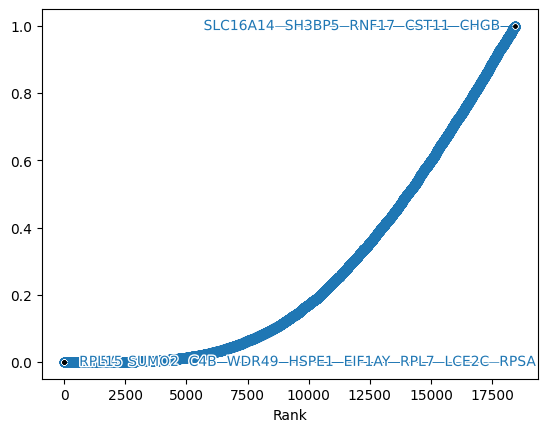

In [43]:
plotting.waterfall_plot(PR_series)